# K-Means Clustering from scratch in Python

### What is K-Means clustering


“K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.” – Wikipedia

K-Means is a popular unsupervised machine learning algorithm used for grouping similar data points into clusters. Its primary objective is to divide a dataset into K distinct, non-overlapping subgroups or clusters, where K is a predefined number.
The algorithm operates on the principle of centroid-based clustering. It begins by randomly selecting K points as initial centroids, then iteratively refines these centroids to minimize the total within-cluster variance. Each data point is assigned to the cluster with the nearest centroid, based on a chosen distance metric (commonly Euclidean distance).

## Algorithm

1. Initialize K centroids
2. Assign each data point to the nearest centroid
3. Recalculate centroids based on the mean of all points in each cluster
4. Repeat steps 2 and 3 until convergence or a maximum number of iterations is reached


## Code

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### KMeans clustering class

In [2]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=10000):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialise centroids to random data points based on n_clusters value
        n_samples = X.shape[0]
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]

        # Optimising clusters
        for _ in range(self.max_iters):
            # Assignment step
            assignment_labels = self._assignment(X)

            # Update centroids
            new_centroids = self._update_centroids(X, assignment_labels)

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break

            # Using updated centroids
            self.centroids = new_centroids
    
    def _assignment(self, X):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    
    def _update_centroids(self, X, labels):
        new_centroids = []

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points):
                centroid = cluster_points.mean(axis=0)
            else:
                centroids = X[np.random.choice(len(X))]
            new_centroids.append(centroid)

        return np.array(new_centroids)

    def calculate_inertia(self, X):
        distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=1)
        inertia = np.sum((X - self.centroids[closest_cluster]) ** 2)
        return inertia

### Create Synthetic data using sklearn

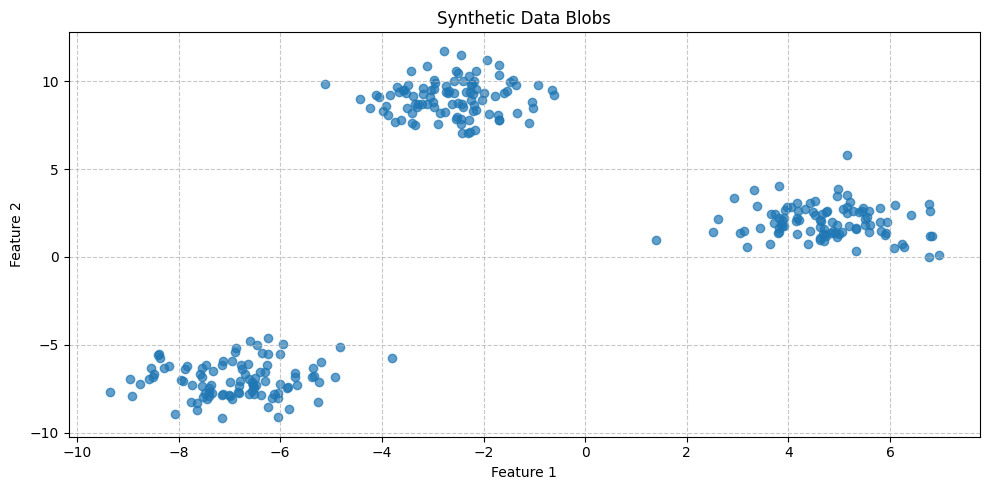

In [3]:
# Generate synthetic data using sklearn.datasets.make_blobs
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Let us Visualize the data blobs
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Synthetic Data Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Let us run KMeans clustering algorithm now !!

In [4]:
# Create a K-Means instance with k clusters
k = 3
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
# labels = kmeans._assignment(X)
# print("Cluster Assignments:", labels)
print("Final Centroids:", kmeans.centroids)

Final Centroids: [[ 4.74710337  2.01059427]
 [-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]]


### Visualise the clusters and centroids

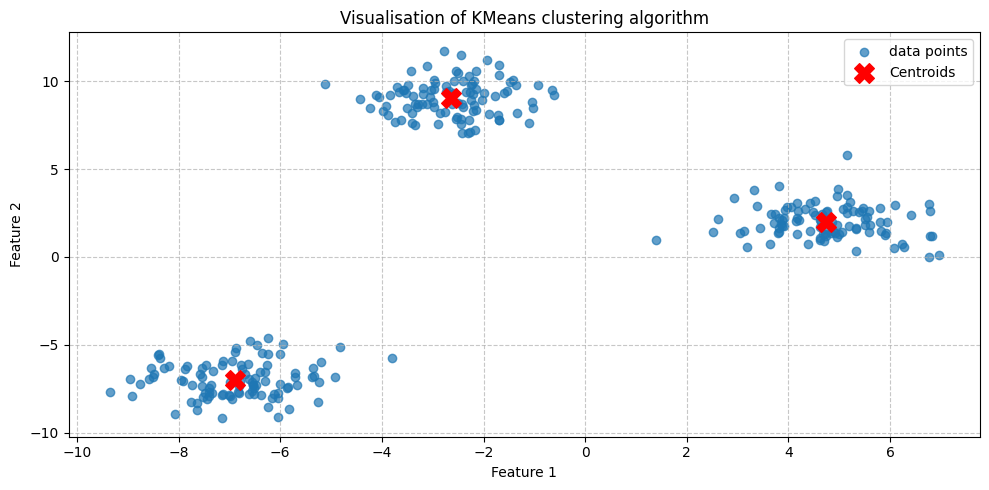

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, label="data points")
plt.title('Visualisation of KMeans clustering algorithm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot the centroids
centroids = kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=1, marker='X', label='Centroids')

plt.legend()
plt.tight_layout()
plt.show()

## Evaluate Clustering: Choosing Optimal `k` using Elbow method

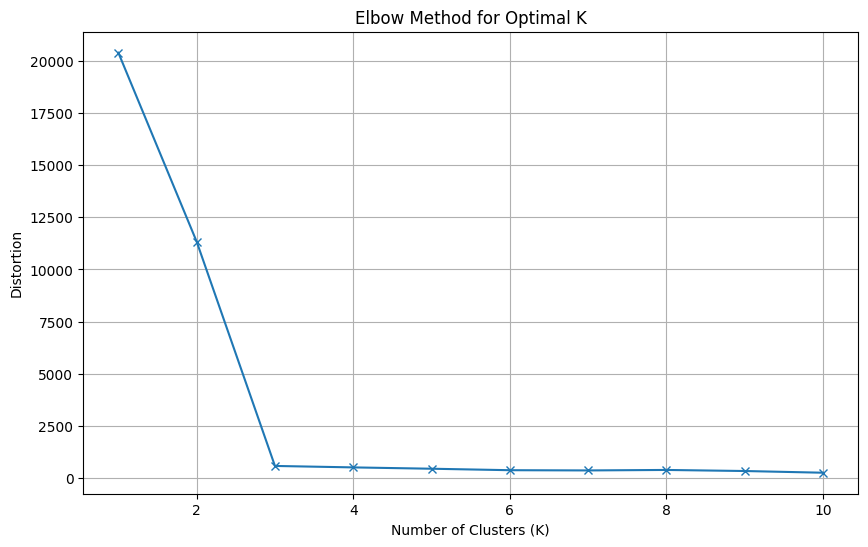

In [6]:
# Calculate distortions for a range of K values
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)  # Replace with your actual class name
    kmeans.fit(X)
    distortion = kmeans.calculate_inertia(X)
    distortions.append(distortion)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, distortions, 'x-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.grid(True)